In [119]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from  math import cos, pi
import seaborn as sns
import pandas as pd         
from pandas_datareader import data
import datetime as dt
import gzip 
import json
import plotly.express as px
from scipy import stats

%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')
#import seaborn as sn 

# David

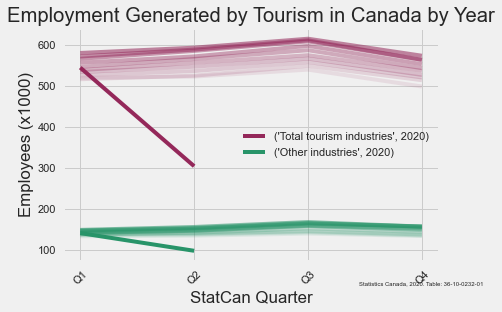

In [120]:
df2 = pd.read_csv(r'data\Employment 2010-2020.csv')
#Dataset taken from: https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=3610023201
df2['REF_DATE'] = pd.DatetimeIndex(df2['REF_DATE'])

years = df2.REF_DATE.dt.year.unique()
variables = ['Total tourism industries', 'Other industries']

numbo = 0.1

fig, ax = plt.subplots()
for year in years:
        if year == years[-1]:
                temp_df = df2.loc[df2.REF_DATE.dt.year == year]
                for var in variables:
                    real_temp = temp_df.loc[temp_df.Activities == var]
                    if var == 'Total tourism industries':
                        ax.plot(real_temp.REF_DATE.dt.month, real_temp.VALUE, color='#94285a', label=(var, year))
                    if var == 'Other industries':
                        ax.plot(real_temp.REF_DATE.dt.month, real_temp.VALUE, color='#289469', label=(var, year))
        else:
                temp_df = df2.loc[df2.REF_DATE.dt.year == year]
                for var in variables:
                    real_temp = temp_df.loc[temp_df.Activities == var]
                    if var == 'Total tourism industries':
                        ax.plot(real_temp.REF_DATE.dt.month, real_temp.VALUE, color='#94285a', alpha=numbo)
                    if var == 'Other industries':
                        ax.plot(real_temp.REF_DATE.dt.month, real_temp.VALUE, color='#289469', alpha=numbo)
                numbo += 0.05

ax.legend()
plt.xticks(df2.REF_DATE.dt.month.unique(), ['Q1','Q2','Q3','Q4'], rotation=45)
plt.ylabel('Employees (x1000)')
plt.xlabel('StatCan Quarter')
plt.title(label='Employment Generated by Tourism in Canada by Year')
plt.annotate('Statistics Canada, 2020. Table: 36-10-0232-01', (1,0), (-80,-20), fontsize=6, 
        xycoords='axes fraction', textcoords='offset points', va='top')
#plt.style.use('seaborn')
plt.show()

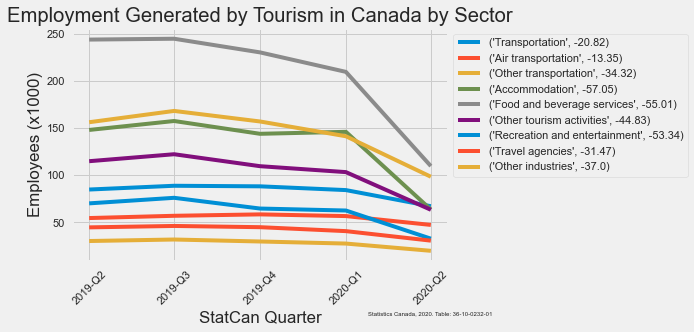

In [121]:
sector_df = pd.read_csv(r'data\Employment 2019-2020.csv')
sector_df['REF_DATE'] = pd.DatetimeIndex(sector_df['REF_DATE'])
lines = sector_df.Activities.unique()

changes= {}

fig, ax = plt.subplots()
for line in lines:
        if line == 'Total tourism industries' or line == 'Tourism activities':
                pass
        else:
                changes[line] = 0
                
                temp_df = sector_df.loc[sector_df['Activities'] == line]
                
                start = temp_df.loc[temp_df.REF_DATE == temp_df.REF_DATE.min(), 'VALUE'].iloc[0]
                end = temp_df.loc[temp_df.REF_DATE == temp_df.REF_DATE.max(), 'VALUE'].iloc[0]
                changes[line] = ((end - start) / start)*100

                ax.plot(temp_df.REF_DATE, temp_df.VALUE, label=(line, round(changes[line], 2)))
                
ax.legend(bbox_to_anchor=(1, 1), frameon = True)
plt.xticks(sector_df.REF_DATE.unique(), ['2019-Q2','2019-Q3','2019-Q4', '2020-Q1', '2020-Q2'], rotation=45)
plt.style.use('seaborn-deep')

plt.ylabel('Employees (x1000)')
plt.xlabel('StatCan Quarter')
plt.title(label='Employment Generated by Tourism in Canada by Sector')
plt.annotate('Statistics Canada, 2020. Table: 36-10-0232-01', (1,0), (-80,-50), fontsize=6, 
        xycoords='axes fraction', textcoords='offset points', va='top')
#plt.style.use('seaborn-deep')
plt.show()

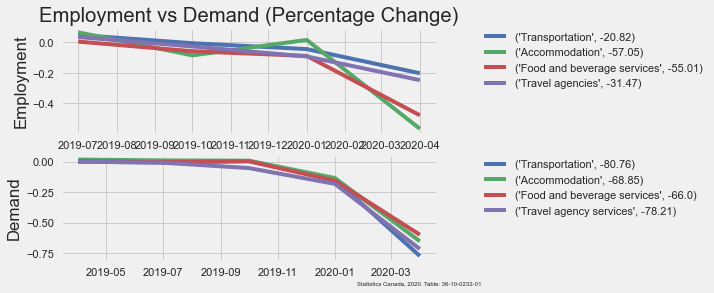

In [122]:
sector_df = pd.read_csv(r'data\Employment 2019-2020.csv')
demand_df = pd.read_csv(r'data\Tourism Demand.csv')

sector_df['REF_DATE'] = pd.DatetimeIndex(sector_df['REF_DATE'])
demand_df['REF_DATE'] = pd.DatetimeIndex(demand_df['REF_DATE'])

lines = sector_df.Activities.unique()
lines2 = demand_df.Expenditures.unique()

changes = {}

fig, ax = plt.subplots(2)

for line in lines:
        if line == 'Transportation' or line == 'Accommodation' or line == 'Travel agencies' or line == 'Food and beverage services':
                changes[line] = 0
                temp_df = sector_df.loc[sector_df['Activities'] == line]
                start = temp_df.loc[temp_df.REF_DATE == temp_df.REF_DATE.min(), 'VALUE'].iloc[0]
                end = temp_df.loc[temp_df.REF_DATE == temp_df.REF_DATE.max(), 'VALUE'].iloc[0]
                changes[line] = ((end - start) / start)*100
                ax[0].plot(temp_df.REF_DATE, temp_df.VALUE.pct_change(), label=((line, round(changes[line], 2))))
        else:
                pass

for line in lines2:
        if line == 'Transportation' or line == 'Accommodation' or line == 'Travel agency services' or line == 'Food and beverage services':
                changes[line] = 0
                temp_df = demand_df.loc[demand_df['Expenditures'] == line]
                start = temp_df.loc[temp_df.REF_DATE == temp_df.REF_DATE.min(), 'VALUE'].iloc[0]
                end = temp_df.loc[temp_df.REF_DATE == temp_df.REF_DATE.max(), 'VALUE'].iloc[0]
                changes[line] = ((end - start) / start)*100
                ax[1].plot(temp_df.REF_DATE, temp_df.VALUE.pct_change(), label=((line, round(changes[line], 2))))
        else:
                pass

ax[0].legend(bbox_to_anchor=(1.1, 1.05))
ax[1].legend(bbox_to_anchor=(1.1, 1.05))
#plt.style.use('seaborn-deep')
plt.setp(ax[0], ylabel='Employment', title='Employment vs Demand (Percentage Change)')
plt.setp(ax[1], ylabel='Demand')

plt.annotate('Statistics Canada, 2020. Table: 36-10-0232-01', (1,0), (-80,-20), fontsize=6, 
        xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

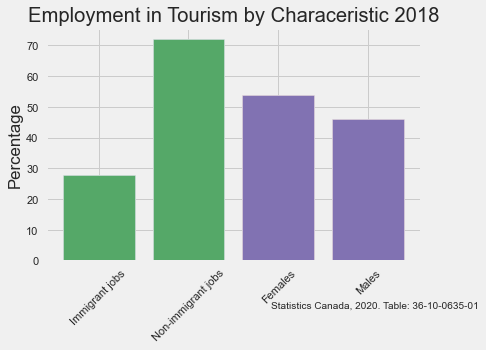

In [123]:
char_df = pd.read_csv(r'data\tourism labour.csv')
immigrant_status = ['Immigrant jobs', 'Non-immigrant jobs']
genders = ['Females', 'Males']

#fig, ax = plt.subplots(ncols=len(industries))
fig, ax = plt.subplots(1)

for im in immigrant_status:
    temp_df = char_df.loc[char_df['Immigrant status'] != 'Total, immigrant and non-immigrant jobs']
    temp_df = temp_df.loc[char_df['Sex'] == 'Both sexes']
    temp_df.groupby(by='Immigrant status').sum()
    ax.bar(temp_df['Immigrant status'], (temp_df.VALUE / temp_df.VALUE.sum())*100)

for gend in genders:
    temp_df = char_df.loc[char_df['Immigrant status'] == 'Total, immigrant and non-immigrant jobs']
    temp_df = temp_df.loc[char_df['Sex'] != 'Both sexes']
    temp_df.groupby(by='Sex').sum()
    ax.bar(temp_df['Sex'], (temp_df.VALUE / temp_df.VALUE.sum())*100)

plt.xticks(rotation=45)
plt.style.use('seaborn-deep')

plt.ylabel('Percentage')
plt.title(label='Employment in Tourism by Characeristic 2018')
plt.annotate('Statistics Canada, 2020. Table: 36-10-0635-01', (1,0), (-150,-40), fontsize=10, 
        xycoords='axes fraction', textcoords='offset points', va='top')
#plt.style.use('seaborn-deep')
plt.show()

# Gaya

In [74]:
tourism_gdp = pd.read_csv('data/36-10-0234-01 Tourism gross domestic product Q2 2020.csv')
tourism_gdp_share = pd.read_csv('data/36-10-0235-01 Tourism share of gross domestic product at basic prices Q2 2020.csv')
tourism_demand = pd.read_csv('data/36-10-0230-01 Tourism demand in Canada Q2 2020.csv')
tourism_related = pd.read_csv('data/36-10-0207-01 Indexes of labour productivity and related measures, by business sector industry.csv')

In [75]:
tourism_gdp = tourism_gdp.drop(['GEO','DGUID', 'Prices','Seasonal adjustment', 'UOM','UOM_ID', 'SCALAR_FACTOR','SCALAR_ID', 'VECTOR', 'COORDINATE','STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],1)

In [76]:
tourism_gdp['REF_DATE'] = pd.to_datetime(tourism_gdp['REF_DATE'])
print(list(tourism_gdp.Activities.unique()))
gdp_ref = tourism_gdp[tourism_gdp['Activities']=='Tourism gross domestic product (GDP)']
gdp_ref = gdp_ref.drop(['Activities'],1)

['Tourism gross domestic product (GDP)', 'Total tourism industries', 'Transportation', 'Accommodation', 'Food and beverage services', 'Other tourism industries', 'Other industries']


In [77]:
gdp_ref = gdp_ref[gdp_ref.REF_DATE.dt.year >= 2018]

Text(0.5, 1.0, 'Tourism Gross Domestic Product (GDP) 2020 Q2')

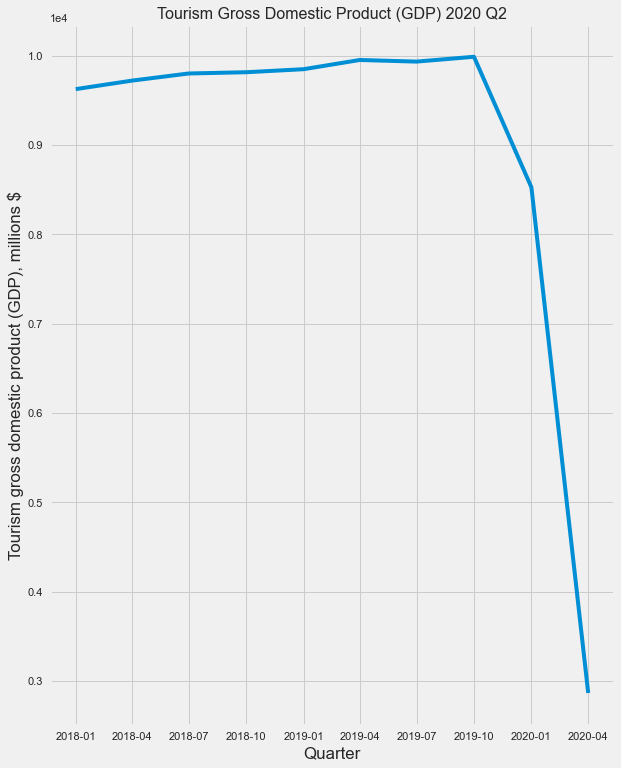

In [78]:
plt.figure(figsize=(9, 12))
plt.plot(gdp_ref.REF_DATE, gdp_ref.VALUE)
plt.xlabel('Quarter')
plt.ylabel('Tourism gross domestic product (GDP), millions $')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('Tourism Gross Domestic Product (GDP) 2020 Q2',fontsize=16)

In [79]:
tourism_gdp_share = tourism_gdp_share.drop(['GEO','DGUID', 'Tourism share', 'UOM','UOM_ID', 'SCALAR_FACTOR','SCALAR_ID', 'VECTOR', 'COORDINATE','STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],1)

In [80]:
tourism_gdp_share['REF_DATE'] = pd.to_datetime(tourism_gdp_share['REF_DATE'])
gdp_share_ref = tourism_gdp_share[tourism_gdp_share.REF_DATE.dt.year >= 2018]

Text(0.5, 1.0, 'Tourism Share Gross Domestic Product (GDP) 2020 Q2')

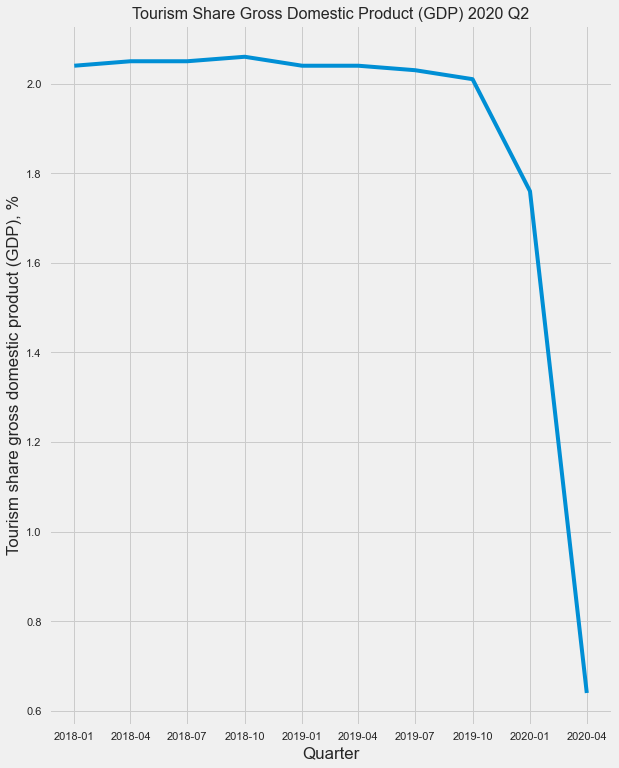

In [81]:
plt.figure(figsize=(9, 12))
plt.plot(gdp_share_ref.REF_DATE, gdp_share_ref.VALUE)
plt.xlabel('Quarter')
plt.ylabel('Tourism share gross domestic product (GDP), %')
plt.title('Tourism Share Gross Domestic Product (GDP) 2020 Q2',fontsize=16)

In [82]:
tourism_demand = tourism_demand.drop(['GEO','DGUID', 'Prices','Seasonal adjustment', 'UOM','UOM_ID', 'SCALAR_FACTOR','SCALAR_ID', 'VECTOR', 'COORDINATE','STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],1)

In [83]:
tourism_demand['REF_DATE'] = pd.to_datetime(tourism_demand['REF_DATE'])
demand_ref = tourism_demand[tourism_demand.REF_DATE.dt.year >= 2018]
demand_ref = demand_ref[demand_ref.Expenditures=='Tourism expenditures']
demand_ref = demand_ref.drop(['Expenditures'],1)

In [84]:
demand_ref_pivot = pd.DataFrame(demand_ref.pivot(index='REF_DATE', columns='Categories'))
demand_ref_pct = demand_ref_pivot.pct_change()


Text(0.5, 1.0, 'Tourism Expenditures by Category 2020 Q2')

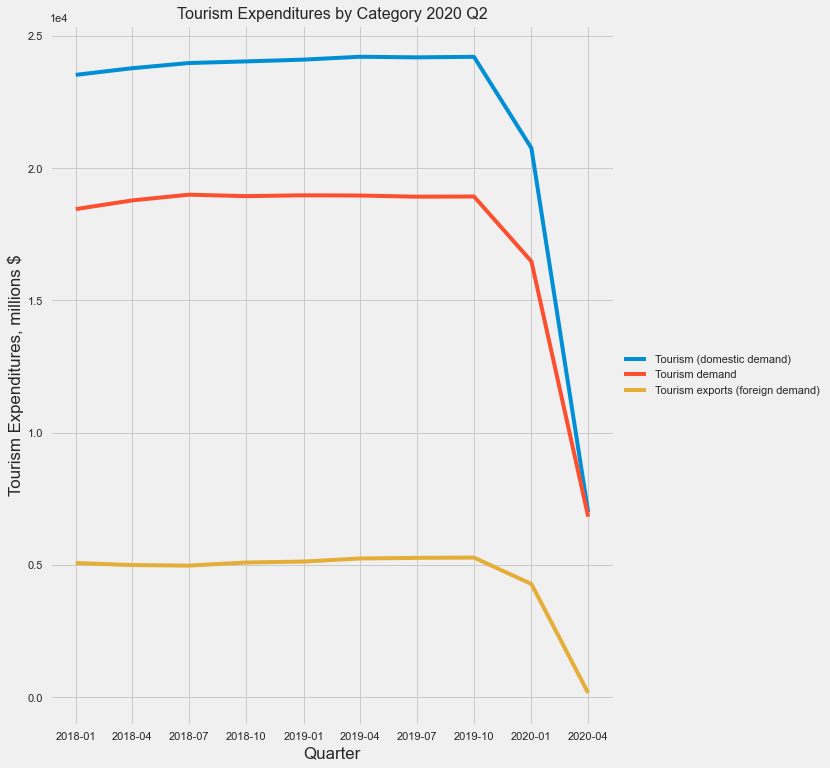

In [85]:
fig, ax = plt.subplots(figsize=(9, 12))
ax.plot(demand_ref_pivot.index,demand_ref_pivot.VALUE['Tourism demand'])
ax.plot(demand_ref_pivot.index,demand_ref_pivot.VALUE['Tourism (domestic demand)'])
ax.plot(demand_ref_pivot.index,demand_ref_pivot.VALUE['Tourism exports (foreign demand)'])
ax.legend(list(demand_ref_pivot.VALUE.columns),loc='center left',bbox_to_anchor=(1, 0.5))
plt.xlabel('Quarter')
plt.ylabel('Tourism Expenditures, millions $')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('Tourism Expenditures by Category 2020 Q2',fontsize=16)

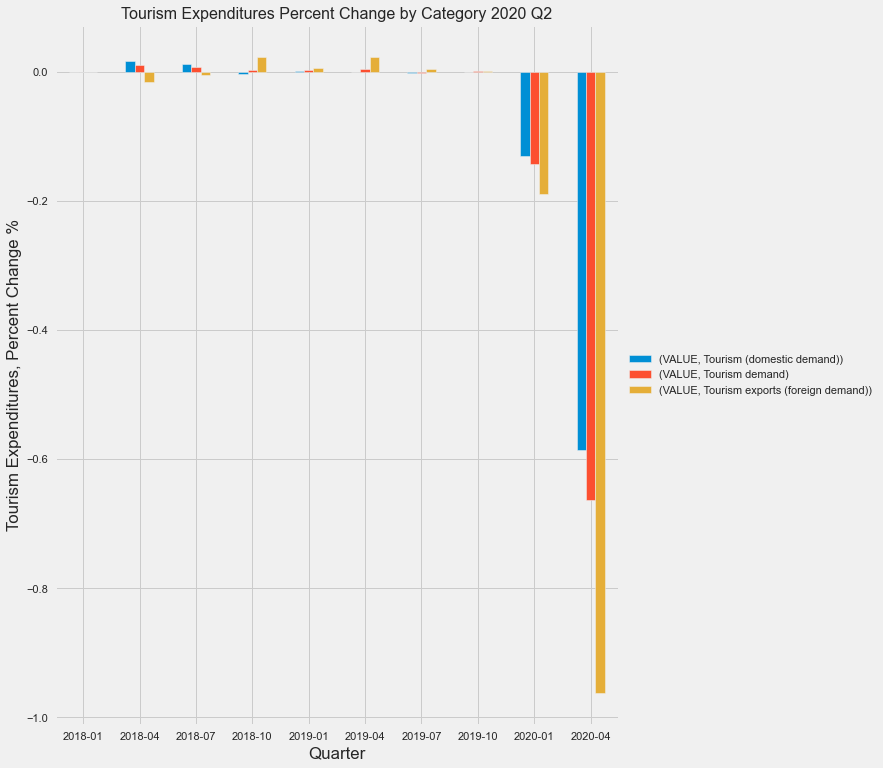

In [86]:
ax = demand_ref_pct.plot(kind='bar',figsize=(9, 12))
x_labels = demand_ref_pct.index.strftime('%Y-%m')
ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(x_labels, rotation=0)
plt.xlabel('Quarter')
plt.ylabel('Tourism Expenditures, Percent Change %')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('Tourism Expenditures Percent Change by Category 2020 Q2',fontsize=16)
plt.show()

Text(0.5, 1.0, 'Tourism Expenditures Percent Change by Category 2020 Q2')

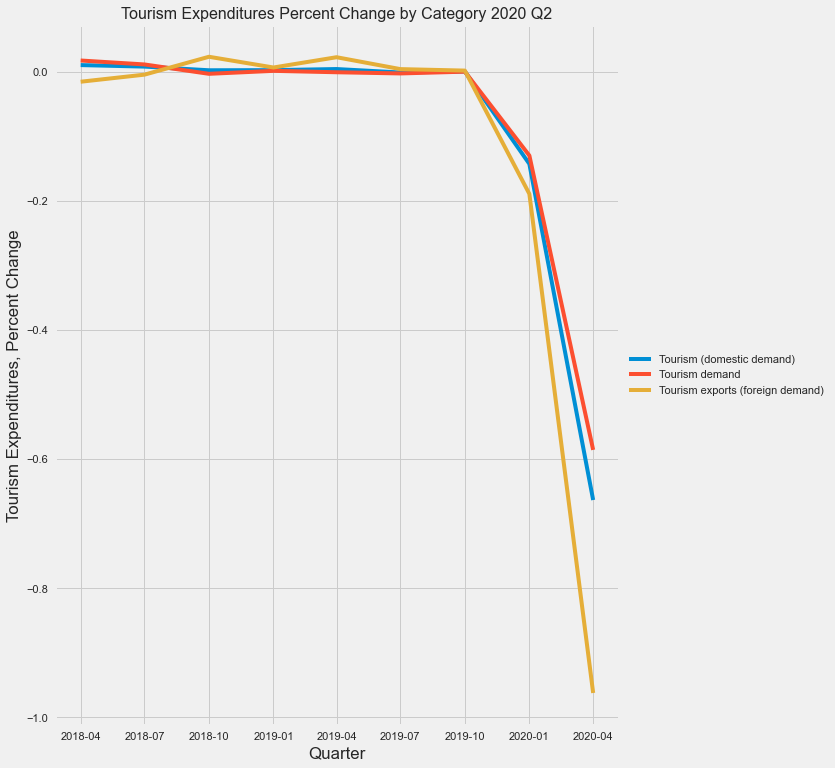

In [87]:
fig, ax = plt.subplots(figsize=(9, 12))
ax.plot(demand_ref_pct.index,demand_ref_pct.VALUE['Tourism demand'])
ax.plot(demand_ref_pct.index,demand_ref_pct.VALUE['Tourism (domestic demand)'])
ax.plot(demand_ref_pct.index,demand_ref_pct.VALUE['Tourism exports (foreign demand)'])
ax.legend(list(demand_ref_pct.VALUE.columns),loc='center left',bbox_to_anchor=(1, 0.5))
plt.xlabel('Quarter')
plt.ylabel('Tourism Expenditures, Percent Change')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('Tourism Expenditures Percent Change by Category 2020 Q2',fontsize=16)

In [88]:
tourism_related = tourism_related.drop(['GEO','DGUID', 'Labour productivity measures and related variables','UOM','UOM_ID', 'SCALAR_FACTOR','SCALAR_ID', 'VECTOR', 'COORDINATE','STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],1)

In [89]:
tourism_related['REF_DATE'] = pd.to_datetime(tourism_related['REF_DATE'])
tourism_related = tourism_related.rename(columns={'North American Industry Classification System (NAICS)' : 'NAICS'})

In [90]:
NAICS_list = ['Total economy','Transportation and warehousing [48-49]', 'Arts, entertainment and recreation [71]','Accommodation and food services [72]']
rel_ref = tourism_related[tourism_related['NAICS'].isin(NAICS_list)]
rel_ref = rel_ref[rel_ref.REF_DATE.dt.year >= 2019]

Text(0.5, 1.0, 'Real gross domestic product (GDP) Percent Change by Category 2020 Q3')

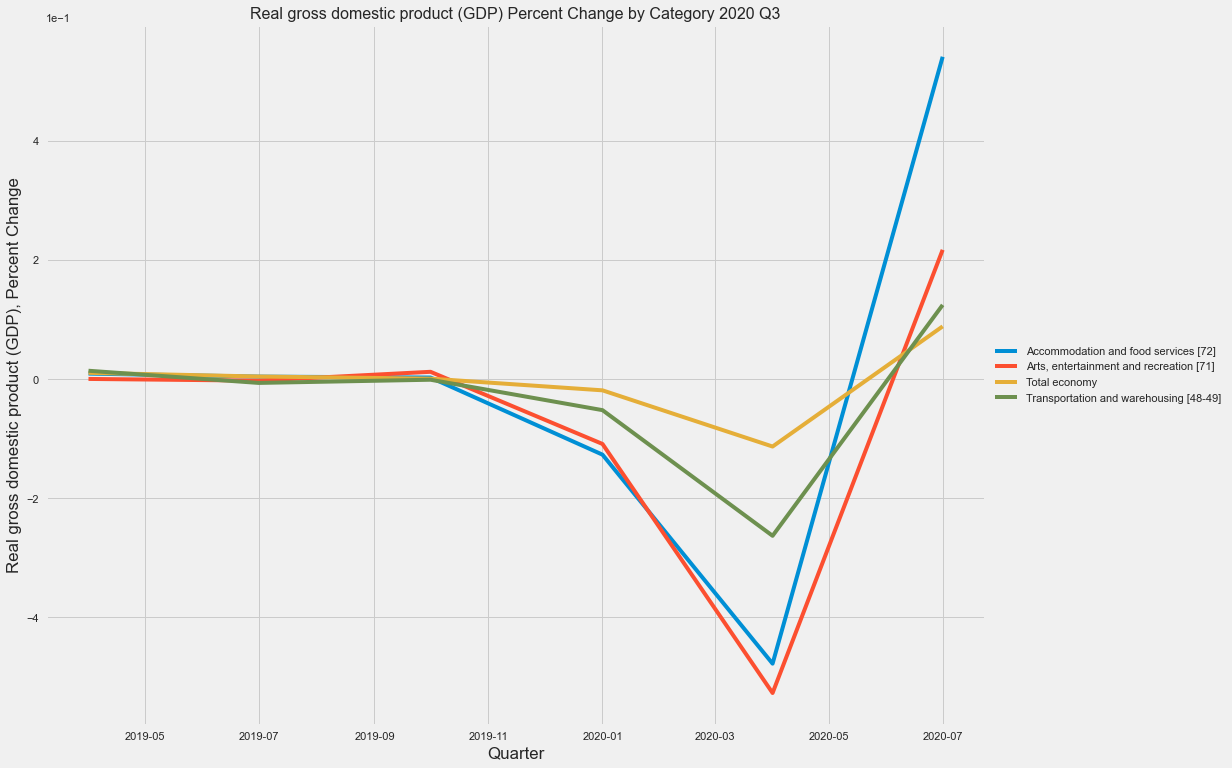

In [91]:
rel_ref_pivot = pd.DataFrame(rel_ref.pivot(index='REF_DATE', columns='NAICS'))
rel_ref_pct = rel_ref_pivot.pct_change()
plt.figure(figsize=(15, 12))
plt.plot(rel_ref_pct.index,rel_ref_pct.VALUE)
plt.legend(list(rel_ref_pct.VALUE.columns),loc='center left',bbox_to_anchor=(1, 0.5))
plt.xlabel('Quarter')
plt.ylabel('Real gross domestic product (GDP), Percent Change')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('Real gross domestic product (GDP) Percent Change by Category 2020 Q3',fontsize=16)

# Ethelbert

In [92]:
ai = pd.read_csv('data/Airline Information.csv')
ai.REF_DATE = pd.to_datetime(ai.REF_DATE)
ai = ai.groupby(by=['REF_DATE', 'Operational and financial statistics'])['VALUE'].sum().unstack().reset_index()
ai = ai.rename(columns={"Passengers": "Passengers (x1000)",
                   "Passenger-kilometres": "Passenger-kilometres (x1000)",
                   "Available seat-kilometres": "Available seat-kilometres (x1000)",
                   "Hours flown": "Hours flown (x1000)",
                   "Turbo fuel consumed": "Turbo fuel consumed (x1000)",
                   "Total operating revenues": "Total operating revenues (x1000)"
                  })
ai['month'] = pd.DatetimeIndex(ai.REF_DATE).month

In [93]:
ai2018 = ai.loc[(ai.REF_DATE > '2017-12-31') & (ai.REF_DATE <= '2018-09-30')].reset_index().drop(columns='index')
ai2019 = ai.loc[(ai.REF_DATE > '2018-12-31') & (ai.REF_DATE <= '2019-09-30')].reset_index().drop(columns='index')
ai2020 = ai.loc[(ai.REF_DATE > '2019-12-31') & (ai.REF_DATE <= '2020-09-30')].reset_index().drop(columns='index')

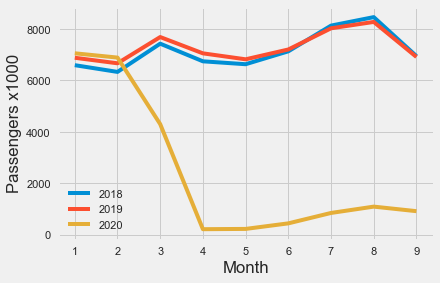

In [94]:
fig, ax = plt.subplots()
ax.plot(ai2018['month'], ai2018['Passengers (x1000)'], label='2018')
ax.plot(ai2019['month'], ai2019['Passengers (x1000)'], label='2019')
ax.plot(ai2020['month'], ai2020['Passengers (x1000)'], label='2020')
plt.xlabel('Month')
plt.ylabel('Passengers x1000')
plt.legend()
plt.show()

In [95]:
cv = pd.read_csv('data/COVID19_Data.csv')
cv = cv.loc[cv.Name == 'Canada']
cv['month'] = pd.DatetimeIndex(cv.Date).month
comp = ai2020.merge(cv.groupby(by=['month']).sum().reset_index(), on='month')

In [96]:
fig = px.scatter_matrix(comp[['Passengers (x1000)',
                             'Total_Cases']])
fig.show()

# Nader

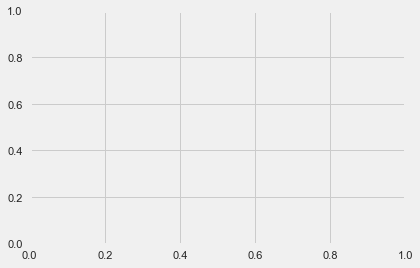

In [97]:
fig, ax = plt.subplots(1)

In [98]:
df_itcp = pd.read_csv('data/Int.trav.can.prov.of.entry.csv')
df_itcp.rename(columns={'Traveller category':'TRAVELLER_CATEGORY_ALL'}, inplace=True)

In [99]:
#clean traveller category
#split by 'entering by' then by ','
#create transport type
#combine 22 transport types
#drop unneeded columns
df_itcp[['TRAVELLER_CATEGORY_TEMP','DURATION']] = df_itcp.TRAVELLER_CATEGORY_ALL.str.split(',',expand = True,n=2)#.apply(pd.Series)
df_itcp = df_itcp.drop(columns=['TRAVELLER_CATEGORY_ALL'])
df_itcp[['TRAVELLER_CATEGORY_TEMP1','TRANSPORT_TYPE1']] = df_itcp.TRAVELLER_CATEGORY_TEMP.str.split('entering by',expand = True,n=2)
df_itcp = df_itcp.drop(columns=['TRAVELLER_CATEGORY_TEMP'])
df_itcp[['TRAVELLER_CATEGORY','TRANSPORT_TYPE2']] = df_itcp.TRAVELLER_CATEGORY_TEMP1.str.split('by',expand = True,n=2)
df_itcp = df_itcp.drop(columns=['TRAVELLER_CATEGORY_TEMP1'])

df_itcp.TRANSPORT_TYPE1 = df_itcp.TRANSPORT_TYPE1.replace(np.nan,'',regex=True)
df_itcp.TRANSPORT_TYPE2 = df_itcp.TRANSPORT_TYPE2.replace(np.nan,'',regex=True)
df_itcp.VALUE = df_itcp.VALUE.replace(np.nan,0,regex=True)
df_itcp['TRANSPORT_TYPE'] = df_itcp['TRANSPORT_TYPE1'].astype(str) + df_itcp['TRANSPORT_TYPE2'].astype(str)
df_itcp = df_itcp.drop(columns=['TRANSPORT_TYPE1','TRANSPORT_TYPE2'])
df_itcp[['YEAR','MONTH']] = df_itcp.REF_DATE.str.split('-',expand = True,n=2)#.apply(pd.Series)
df_itcp.TRAVELLER_CATEGORY = df_itcp.TRAVELLER_CATEGORY.str.strip()
df_itcp.TRANSPORT_TYPE = df_itcp.TRANSPORT_TYPE.str.strip()


In [100]:
df_itcp_canadian2020 = df_itcp.loc [((df_itcp.TRAVELLER_CATEGORY =='Total Canadian travellers returning from abroad')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from United States')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from countries other than United States')
| (df_itcp.TRAVELLER_CATEGORY =='Total non resident travellers')) 
& (df_itcp.YEAR == '2020')
& (df_itcp.GEO != 'Canada')
]

In [101]:
df_itcp_canadian2019 = df_itcp.loc [((df_itcp.TRAVELLER_CATEGORY =='Total Canadian travellers returning from abroad')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from United States')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from countries other than United States')
| (df_itcp.TRAVELLER_CATEGORY =='Total non resident travellers')) 
& (df_itcp.YEAR == '2019')
& (df_itcp.GEO != 'Canada')
]

In [102]:
df_itcp_canadian2018 = df_itcp.loc [((df_itcp.TRAVELLER_CATEGORY =='Total Canadian travellers returning from abroad')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from United States')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from countries other than United States')
| (df_itcp.TRAVELLER_CATEGORY =='Total non resident travellers')) 
& (df_itcp.YEAR == '2018')
& (df_itcp.GEO != 'Canada')
]

In [103]:
df_itcp_can_2020_Trans_type = df_itcp.loc [((df_itcp.TRAVELLER_CATEGORY =='Total Canadian travellers returning from abroad')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from United States')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from countries other than United States')
| (df_itcp.TRAVELLER_CATEGORY =='Total non resident travellers')) 
& (df_itcp.YEAR == '2020')
& (df_itcp.GEO == 'Canada')
& (df_itcp.TRANSPORT_TYPE != '')
]

In [104]:
df_itcp_can_2020_Trans_type_ = df_itcp.loc [
    ((df_itcp.TRAVELLER_CATEGORY =='Total Canadian travellers returning from abroad')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from United States')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from countries other than United States')
| (df_itcp.TRAVELLER_CATEGORY =='Total non resident travellers')) 
& (df_itcp.YEAR > '2015')
& (df_itcp.GEO == 'Canada')
& (df_itcp.TRANSPORT_TYPE == 'plane')
]

In [105]:
df_itcp_on_2020_Trans_type = df_itcp.loc [((df_itcp.TRAVELLER_CATEGORY =='Total Canadian travellers returning from abroad')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from United States')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from countries other than United States')
| (df_itcp.TRAVELLER_CATEGORY =='Total non resident travellers')) 
& (df_itcp.YEAR == '2020')
& (df_itcp.GEO == 'Ontario')
& (df_itcp.TRANSPORT_TYPE != '')
]

In [106]:
df_itcp_qc_2020_Trans_type = df_itcp.loc [((df_itcp.TRAVELLER_CATEGORY =='Total Canadian travellers returning from abroad')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from United States')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from countries other than United States')
| (df_itcp.TRAVELLER_CATEGORY =='Total non resident travellers')) 
& (df_itcp.YEAR == '2020')
& (df_itcp.GEO == 'Quebec')
& (df_itcp.TRANSPORT_TYPE != '')
]

In [107]:

df_itcp_bc_2020_Trans_type = df_itcp.loc [((df_itcp.TRAVELLER_CATEGORY =='Total Canadian travellers returning from abroad')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from United States')
| (df_itcp.TRAVELLER_CATEGORY =='Canadian travellers returning from countries other than United States')
| (df_itcp.TRAVELLER_CATEGORY =='Total non resident travellers')) 
& (df_itcp.YEAR == '2020')
& (df_itcp.GEO == 'British Columbia')
& (df_itcp.TRANSPORT_TYPE != '')
]

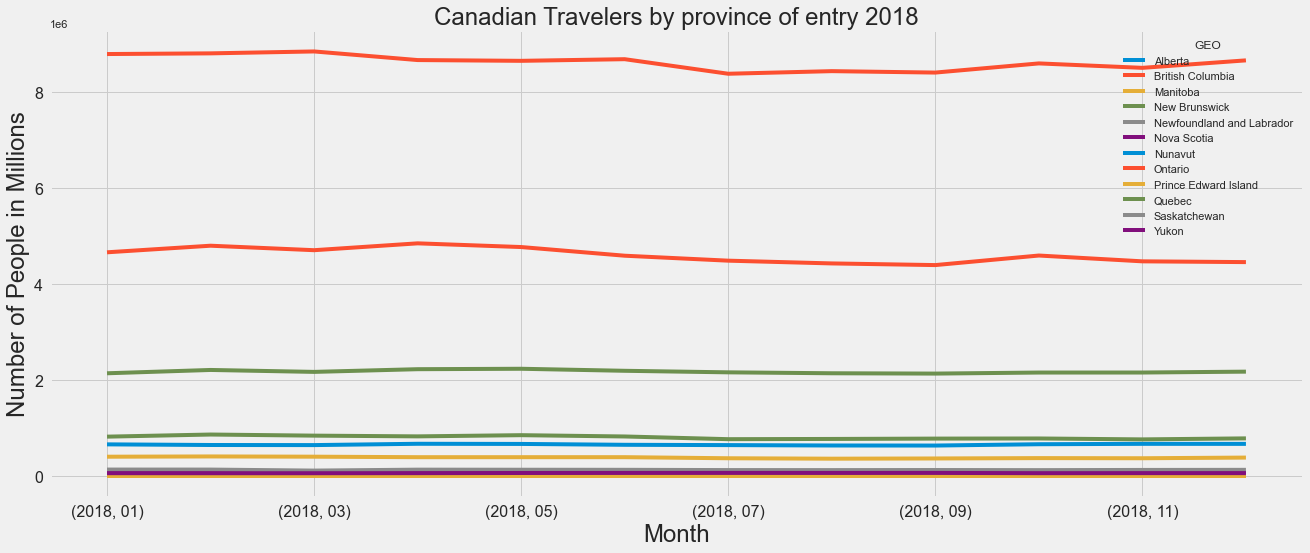

In [108]:
ax= df_itcp_canadian2018.groupby (['YEAR','MONTH','GEO']).VALUE.sum().unstack().plot(kind='line',figsize= (20,8),fontsize=16)
ax.set_ylabel('Number of People in Millions',fontdict={'fontsize':24})
ax.set_xlabel('Month',fontdict={'fontsize':24})
ax.set_title('Canadian Travelers by province of entry 2018',fontdict={'fontsize':24})
ax.displayvalue = True

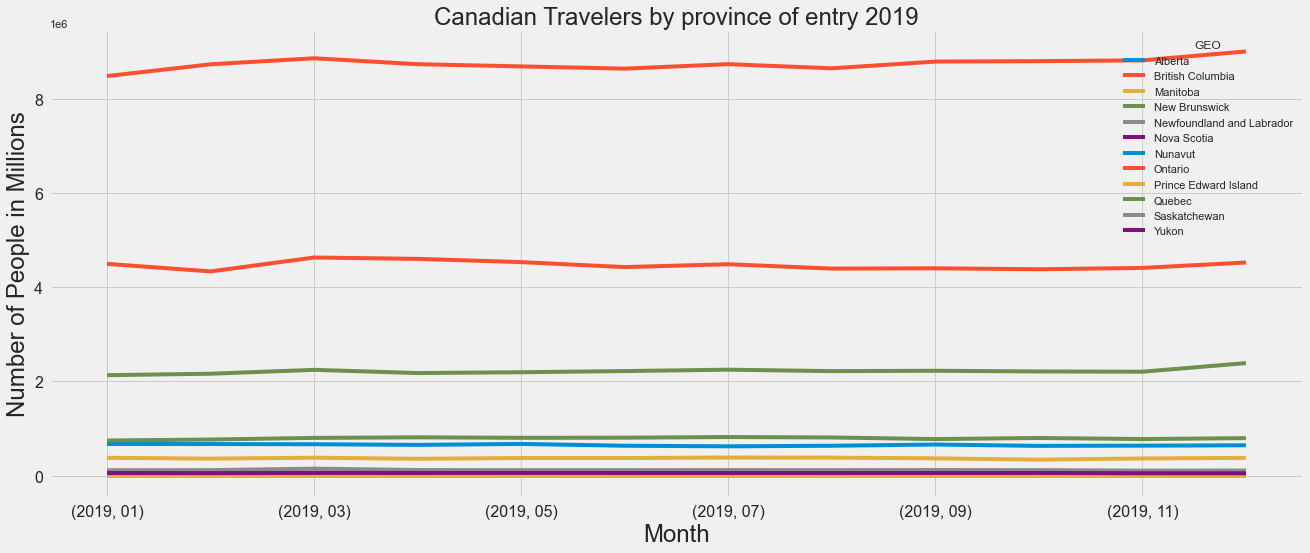

In [109]:
ax= df_itcp_canadian2019.groupby (['YEAR','MONTH','GEO']).VALUE.sum().unstack().plot(kind='line',figsize= (20,8),fontsize=16)

ax.set_ylabel('Number of People in Millions',fontdict={'fontsize':24})
ax.set_xlabel('Month',fontdict={'fontsize':24})
ax.set_title('Canadian Travelers by province of entry 2019',fontdict={'fontsize':24})
ax.displayvalue = True

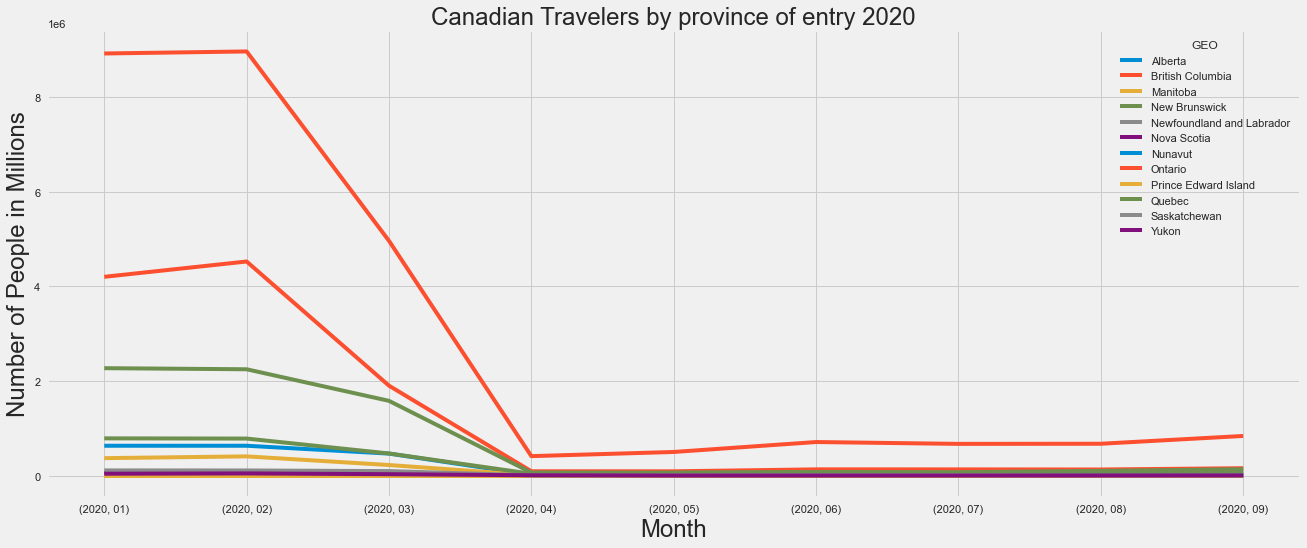

In [110]:
ax = df_itcp_canadian2020.groupby (['YEAR','MONTH','GEO']).VALUE.sum().unstack().plot(kind='line',figsize= (20,8),grid=True)                                                               
ax.set_ylabel('Number of People in Millions',fontdict={'fontsize':24})
ax.set_xlabel('Month',fontdict={'fontsize':24})
ax.set_title('Canadian Travelers by province of entry 2020',fontdict={'fontsize':24})
ax.displayvalue = True

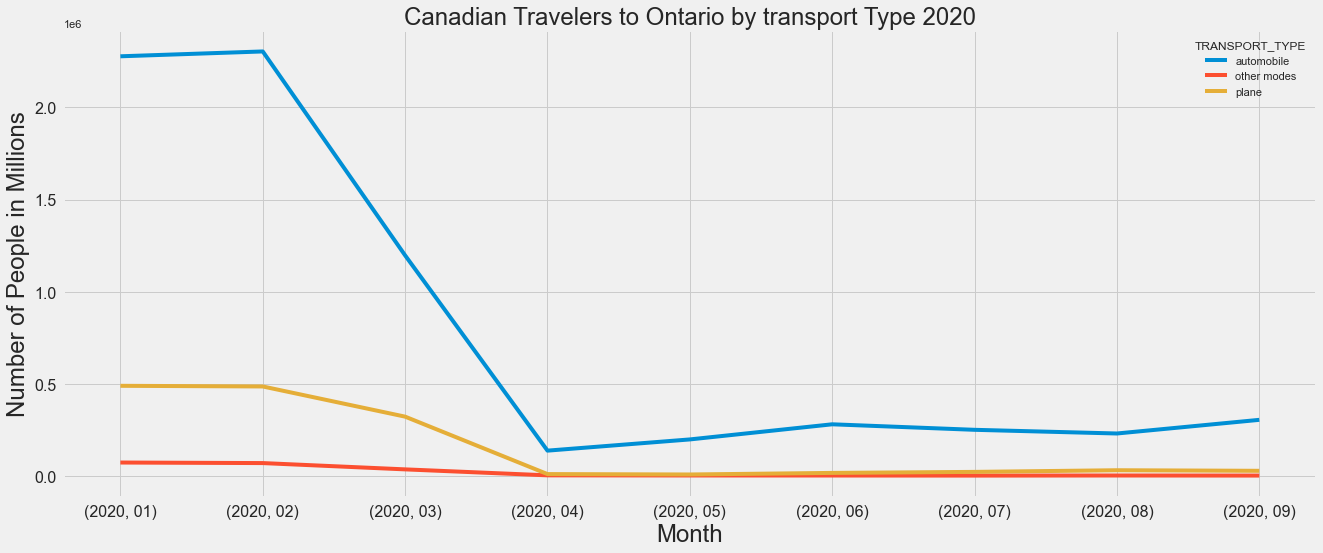

In [111]:
ax = df_itcp_on_2020_Trans_type.groupby (['YEAR','MONTH','TRANSPORT_TYPE']).VALUE.sum().unstack().plot(kind='line',figsize= (20,8), fontsize=16    )
ax.set_ylabel('Number of People in Millions',fontdict={'fontsize':24})
ax.set_xlabel('Month',fontdict={'fontsize':24})
ax.set_title('Canadian Travelers to Ontario by transport Type 2020',fontdict={'fontsize':24})
ax.displayvalue = True

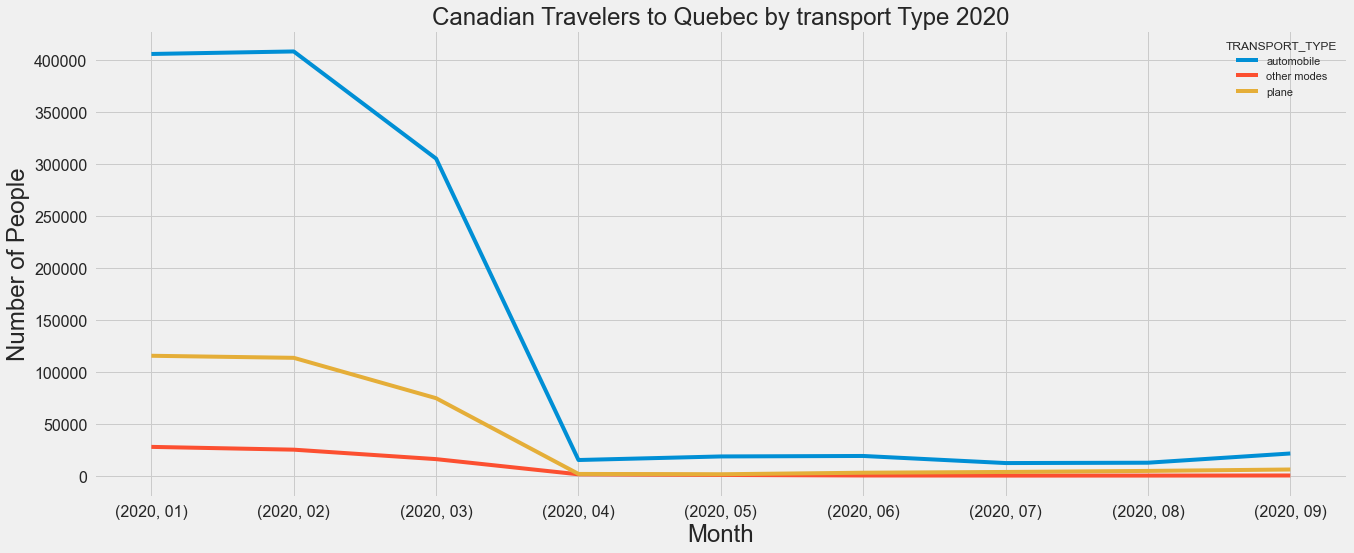

In [112]:
ax = df_itcp_qc_2020_Trans_type.groupby (['YEAR','MONTH','TRANSPORT_TYPE']).VALUE.sum().unstack().plot(kind='line',figsize= (20,8), fontsize=16    )
ax.set_ylabel('Number of People',fontdict={'fontsize':24})
ax.set_xlabel('Month',fontdict={'fontsize':24})
ax.set_title('Canadian Travelers to Quebec by transport Type 2020',fontdict={'fontsize':24})
ax.displayvalue = True

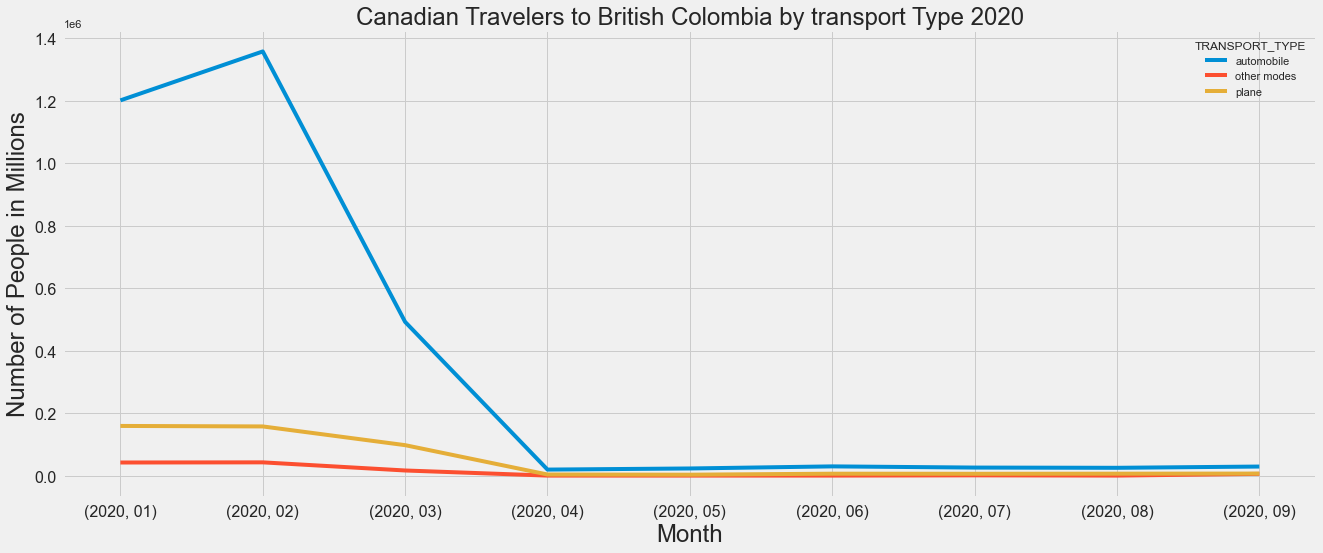

In [113]:
ax = df_itcp_bc_2020_Trans_type.groupby (['YEAR','MONTH','TRANSPORT_TYPE']).VALUE.sum().unstack().plot(kind='line',figsize= (20,8), fontsize=16    )
ax.set_ylabel('Number of People in Millions',fontdict={'fontsize':24})
ax.set_xlabel('Month',fontdict={'fontsize':24})
ax.set_title('Canadian Travelers to British Colombia by transport Type 2020',fontdict={'fontsize':24})
ax.displayvalue = True

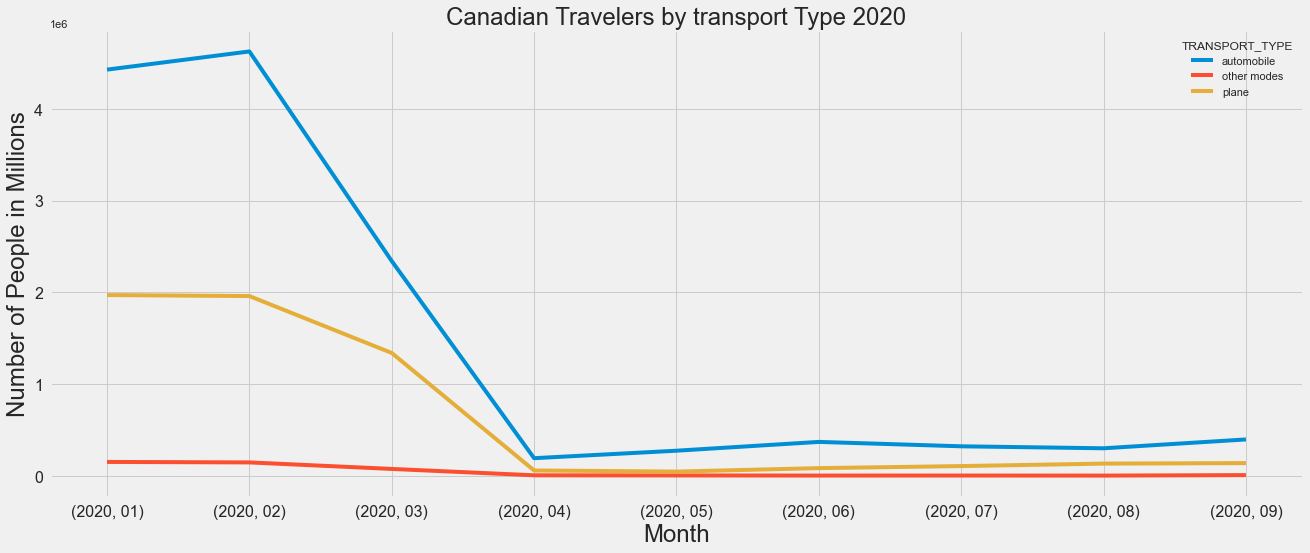

In [114]:
ax = df_itcp_can_2020_Trans_type.groupby (['YEAR','MONTH','TRANSPORT_TYPE']).VALUE.sum().unstack().plot(kind='line',figsize= (20,8), fontsize=16    )
ax.set_ylabel('Number of People in Millions',fontdict={'fontsize':24})
ax.set_xlabel('Month',fontdict={'fontsize':24})
ax.set_title('Canadian Travelers by transport Type 2020',fontdict={'fontsize':24})
ax.displayvalue = True

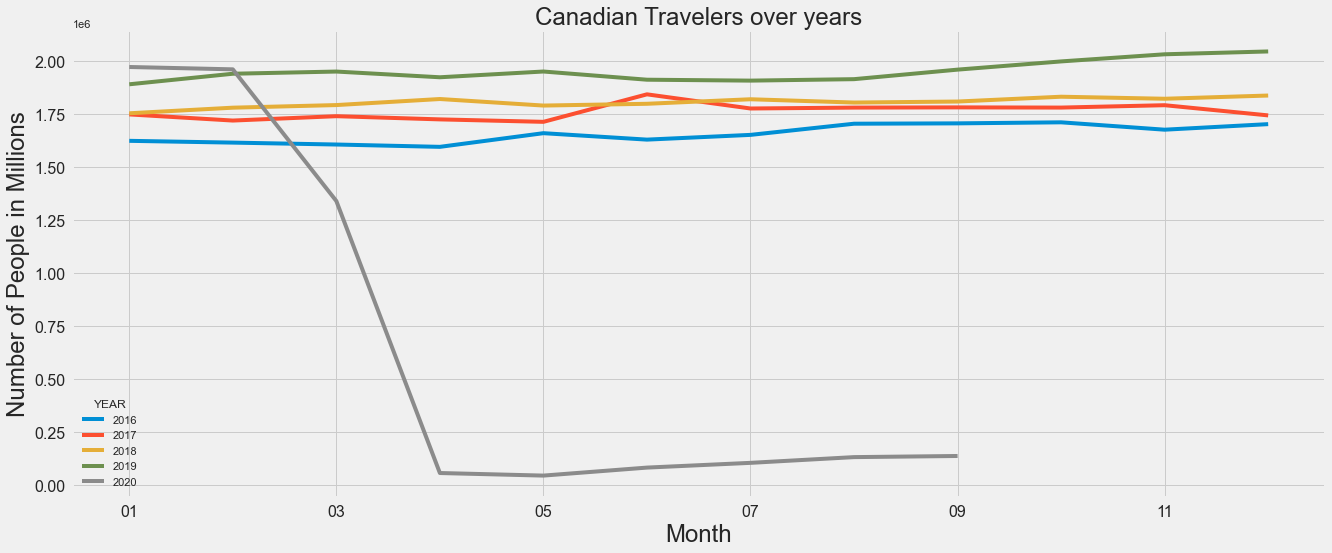

In [115]:
ax = df_itcp_can_2020_Trans_type_.groupby (['MONTH','YEAR']).VALUE.sum().unstack().plot(kind='line',figsize= (20,8),fontsize=16)
ax.set_ylabel('Number of People in Millions',fontdict={'fontsize':24})
ax.set_xlabel('Month',fontdict={'fontsize':24})
ax.set_title('Canadian Travelers over years',fontdict={'fontsize':24})
ax.displayvalue = True